<a href="https://colab.research.google.com/github/CamiloVga/Curso-IA-Aplicada/blob/main/Script_Clase_12_Fundamentos_de_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Inteligencia Artificial Aplicada para la Economía
## Universidad de los Andes

### 👨‍🏫 Profesores
- **Profesor Magistral:** [Camilo Vega Barbosa](https://www.linkedin.com/in/camilo-vega-169084b1/)
- **Asistente de Docencia:** [Sergio Julian Zona Moreno](https://www.linkedin.com/in/sergio-julian-zona-moreno/)

### 📚 Ejercicio Práctico: Predicción de Admisiones en Escuelas de Derecho
Este notebook demuestra la implementación práctica de conceptos fundamentales de Deep Learning:

1. **Fundamentos de Redes Neuronales**
   - Arquitectura básica
   - Proceso de forward propagation
   - Función de activación

2. **Perceptrón Simple**
   - Implementación desde cero
   - Entrenamiento con datos reales
   - Visualización de la frontera de decisión

3. **Perceptrón Multicapa (MLP)**
   - Arquitectura con capas ocultas
   - Funciones de activación ReLU y Sigmoid
   - Proceso de entrenamiento

4. **Deep Learning**
   - Implementación de red con 4 capas
   - Técnicas de backpropagation
   - Optimización de hiperparámetros
   - Grid Search para calibración

### 🎯 Objetivo
Predecir la admisión de estudiantes a escuelas de derecho utilizando variables clave:
- LSAT score
- GPA
- Estado de residencia


### Requisitos Técnicos:
- **Token de Hugging Face**: Necesario para acceder al dataset. Puedes obtener tu token en [Hugging Face](https://huggingface.co/settings/tokens)
- **Entorno de Ejecución**:
  - Recomendado: GPU T4 (Cambiar en: Runtime -> Change runtime type -> GPU)
- **Memoria RAM**: Mínimo 4GB recomendados
- **Espacio en Disco**: ~200 GB para datasets y modelos

# 🛠️ Instalaciones Necesarias

Antes de comenzar, necesitamos instalar algunas librerías específicas para nuestro análisis de Deep Learning. A continuación se listan las librerías y su propósito:

### Manejo de Datos y Cálculos
- **pandas**: Manipulación y análisis de datos tabulares
- **numpy**: Operaciones numéricas y matrices multidimensionales
- **scipy**: Funciones científicas y estadísticas avanzadas
- **ydata-profiling**: Generación automatizada de reportes de análisis exploratorio de datos

### Deep Learning y Machine Learning
- **tensorflow**: Framework principal para implementación de redes neuronales
- **keras**: API de alto nivel para construcción de modelos de deep learning
- **scikit-learn**: Herramientas complementarias para preprocesamiento y evaluación
- **pytorch**: Framework alternativo para deep learning, popular en investigación y desarrollo

### Visualización
- **matplotlib**: Biblioteca base para crear gráficos estáticos
- **seaborn**: Visualizaciones estadísticas de alto nivel
- **plotly**: Gráficos interactivos para análisis detallado

### Optimización y Evaluación
- **optuna**: Optimización automática de hiperparámetros
- **tensorboard**: Visualización y monitoreo del entrenamiento
- **scikit-optimize**: Optimización de hiperparámetros y búsqueda en grid

### Utilidades
- **tqdm**: Barras de progreso para monitorear procesos largos
- **joblib**: Paralelización y caching de operaciones computacionales



In [3]:
# Instalación silenciosa de librerías
# Frameworks de Deep Learning
!pip install -q tensorflow
!pip install -q torch
!pip install -q keras
!pip install -q keras-tuner

# Análisis y manipulación de datos
!pip install -q pandas
!pip install -q numpy
!pip install -q scikit-learn

# Visualización
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly

# Optimización y evaluación
!pip install -q optuna
!pip install -q tensorboard
!pip install -q scikit-optimize

# Utilidades
!pip install -q tqdm
!pip install -q joblib

# Análisis exploratorio y acceso a datos
!pip install -q ydata-profiling
!pip install -q datasets
!pip install -q huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


# 📊 Base de Datos: Bank Marketing

Para este ejercicio utilizaremos la base de datos "Bank Marketing" disponible en [HuggingFace](https://huggingface.co/datasets/cestwc/bank-marketing), que contiene información sobre campañas de marketing de una institución bancaria portuguesa.

## 📝 Descripción
La base contiene información detallada sobre campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo es predecir si el cliente suscribirá un depósito a plazo (variable 'y').

## 🔍 Variables Disponibles

### Información del Cliente
- **age**: Edad del cliente
- **job**: Tipo de trabajo
- **marital**: Estado civil
- **education**: Nivel educativo
- **default**: ¿Tiene crédito en default?
- **balance**: Saldo promedio anual
- **housing**: ¿Tiene préstamo de vivienda?
- **loan**: ¿Tiene préstamo personal?

### Información de la Campaña Actual
- **contact**: Tipo de contacto
- **day**: Último día de contacto del mes
- **month**: Último mes de contacto
- **duration**: Duración del último contacto en segundos
- **campaign**: Número de contactos realizados durante esta campaña
- **pdays**: Días transcurridos desde el último contacto
- **previous**: Número de contactos realizados antes de esta campaña
- **poutcome**: Resultado de la campaña de marketing anterior

### Variable Objetivo
- **y**: ¿El cliente suscribió un depósito a plazo? (0=no, 1=sí)

In [ ]:

# Importamos las librerías necesarias
import pandas as pd
from datasets import load_dataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

# Cargamos el dataset y lo mezclamos
print("⏳ Cargando y mezclando 10,000 registros aleatorios de Bank Marketing desde HuggingFace...")
dataset = load_dataset("cestwc/bank-marketing", streaming=True)
df = pd.DataFrame(list(dataset['train'].shuffle(seed=42).take(10000)))

print("\n📊 Generando reporte de análisis exploratorio...")
profile = ProfileReport(df,
                       title="Análisis Exploratorio - Dataset Bank Marketing (10k registros)",
                       correlations={
                           "pearson": {"calculate": True},
                           "spearman": {"calculate": True},
                           "kendall": {"calculate": True},
                           "phi_k": {"calculate": True},
                       },
                       missing_diagrams={
                           "matrix": True,
                           "bar": True,
                           "heatmap": True,
                       },
                       samples={"head": 10})

# Guardamos el reporte en HTML
print("\n💾 Guardando reporte...")
profile.to_file("analisis_bank_marketing_10k.html")

# Mostramos información básica del dataset
print("\n📈 Resumen del Dataset:")
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")
print("\nInformación de las variables:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

# Mostramos distribución de la variable objetivo
print("\nDistribución de la variable objetivo (y):")
print("0 = No suscribió depósito a plazo")
print("1 = Sí suscribió depósito a plazo")
print(df['y'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

print("\n✅ Proceso completado. El reporte detallado se ha guardado en 'analisis_bank_marketing_10k.html'")


⏳ Cargando y mezclando 10,000 registros aleatorios de Bank Marketing desde HuggingFace...

📊 Generando reporte de análisis exploratorio...

💾 Guardando reporte...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


📈 Resumen del Dataset:
Número de registros: 10000
Número de variables: 17

Información de las variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10000 non-null  float64
 1   job        10000 non-null  int64  
 2   marital    10000 non-null  int64  
 3   education  10000 non-null  int64  
 4   default    10000 non-null  int64  
 5   balance    10000 non-null  float64
 6   housing    10000 non-null  int64  
 7   loan       10000 non-null  int64  
 8   contact    10000 non-null  int64  
 9   day        10000 non-null  float64
 10  month      10000 non-null  int64  
 11  duration   10000 non-null  float64
 12  campaign   10000 non-null  float64
 13  pdays      10000 non-null  float64
 14  previous   10000 non-null  float64
 15  poutcome   10000 non-null  int64  
 16  y          10000 non-null  int64  
dtypes: float64(7), int64(

# 🤖 Implementación de Perceptrón Simple
Para nuestra primera aproximación al deep learning, implementaremos un perceptrón simple
utilizando solo tres características del dataset:
- age: Edad del cliente
- balance: Saldo promedio anual
- duration: Duración de la última llamada

El perceptrón intentará predecir si el cliente suscribirá un depósito a plazo (y).
Esta implementación básica nos ayudará a entender:
1. Cómo funciona la propagación hacia adelante (forward propagation)
2. Cómo se realiza el entrenamiento con datos reales
3. Cómo visualizar la frontera de decisión del perceptrón
"""

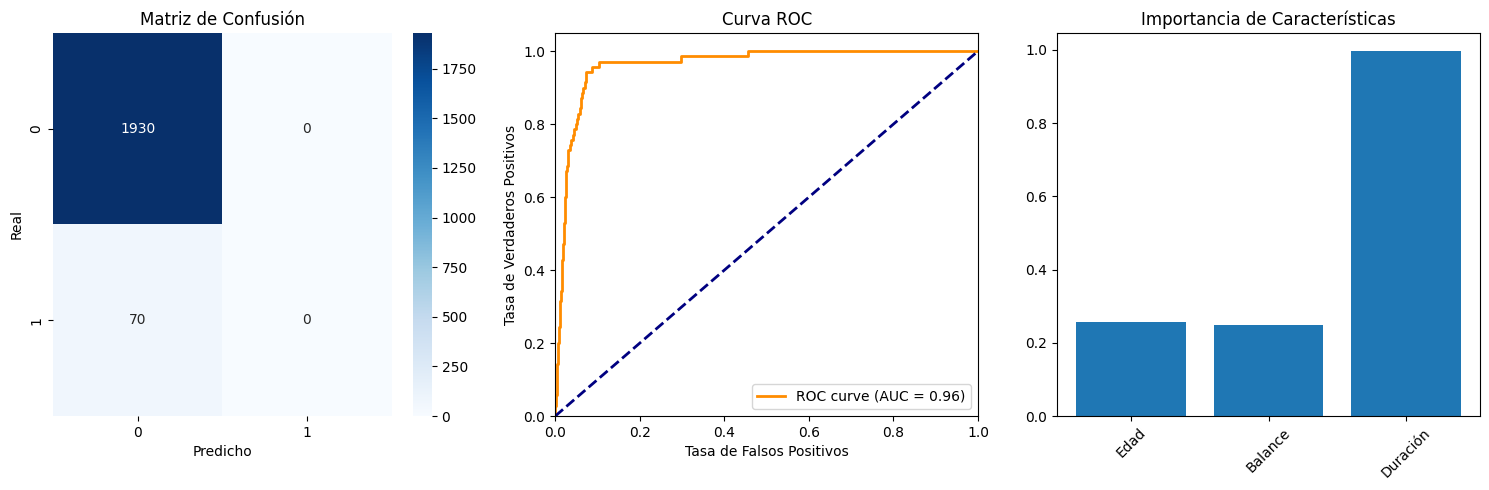


=== Matriz de Confusión ===
                     Predicho NO     Predicho SÍ
Real NO (0) [+]     1930 (VP)        0 (FN)
Real SÍ (1) [-]       70 (FP)        0 (VN)

=== Métricas de Desempeño ===
              Métrica   Valor                                        Fórmula
             Accuracy  96.50% (VP+VN)/(VP+VN+FP+FN) = (1930+0)/(1930+0+70+0)
Recall (Sensibilidad) 100.00%                     VP/(VP+FN) = 1930/(1930+0)
        Especificidad   0.00%                          VN/(VN+FP) = 0/(0+70)
            Precisión  96.50%                    VP/(VP+FP) = 1930/(1930+70)
             F1-Score  98.22%        2*(Precision*Recall)/(Precision+Recall)
              ROC-AUC  96.38%                         Área bajo la curva ROC

=== Ejemplo de Predicción ===
Cliente con:
- Edad: 32.0 años
- Balance: $1780.0
- Duración de llamada: 100.0 segundos
Probabilidad de suscripción: 1.36%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. PREPARACIÓN DE DATOS
# ----------------------
# Seleccionamos solo 3 características para mantenerlo simple
X = df[['age', 'balance', 'duration']]
y = df['y']

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. CREACIÓN Y ENTRENAMIENTO DEL PERCEPTRÓN
# -----------------------------------------
# Creamos un perceptrón simple (una capa oculta con 3 neuronas)
perceptron = MLPClassifier(
    hidden_layer_sizes=(3,),  # Una capa oculta con 3 neuronas
    activation='logistic',    # Función de activación sigmoide
    solver='sgd',            # Descenso de gradiente estocástico
    max_iter=1000,           # Máximo número de iteraciones
    random_state=42
)

# Entrenamos el modelo
perceptron.fit(X_train_scaled, y_train)

# 3. EVALUACIÓN DEL MODELO
# -----------------------
# Hacemos predicciones
y_pred = perceptron.predict(X_test_scaled)
y_pred_prob = perceptron.predict_proba(X_test_scaled)[:, 1]

# Calculamos ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 4. VISUALIZACIONES
# -----------------
plt.figure(figsize=(15, 5))

# 4.1 Matriz de Confusión
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')

# 4.2 Curva ROC
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# 4.3 Importancia de características
plt.subplot(1, 3, 3)
feature_importance = np.abs(perceptron.coefs_[0]).mean(axis=1)
features = ['Edad', 'Balance', 'Duración']
plt.bar(features, feature_importance)
plt.title('Importancia de Características')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 5. CÁLCULO DE MÉTRICAS DE DESEMPEÑO
# -------------------------------------
# Extraer valores de la matriz de confusión - ajustado para clase 0 como positiva
vp = cm[0,0]  # Verdaderos Positivos (NO predicho como NO)
fn = cm[0,1]  # Falsos Negativos (NO predicho como SÍ)
fp = cm[1,0]  # Falsos Positivos (SÍ predicho como NO)
vn = cm[1,1]  # Verdaderos Negativos (SÍ predicho como SÍ)

# Calcular métricas globales
accuracy = (vp + vn) / (vp + vn + fp + fn)
specificity = vn / (vn + fp) if (vn + fp) > 0 else 0  # VN/(VN+FP)
precision = vp / (vp + fp)                             # VP/(VP+FP)
recall = vp / (vp + fn)                               # VP/(VP+FN)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Crear DataFrame para métricas globales
metrics_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Recall (Sensibilidad)', 'Especificidad', 'Precisión', 'F1-Score', 'ROC-AUC'],
    'Valor': [
        f"{accuracy:.2%}",
        f"{recall:.2%}",
        f"{specificity:.2%}",
        f"{precision:.2%}",
        f"{f1_score:.2%}",
        f"{roc_auc:.2%}"
    ],
    'Fórmula': [
        f"(VP+VN)/(VP+VN+FP+FN) = ({vp}+{vn})/({vp}+{vn}+{fp}+{fn})",
        f"VP/(VP+FN) = {vp}/({vp}+{fn})",
        f"VN/(VN+FP) = {vn}/({vn}+{fp})",
        f"VP/(VP+FP) = {vp}/({vp}+{fp})",
        f"2*(Precision*Recall)/(Precision+Recall)",
        "Área bajo la curva ROC"
    ]
})

# 6. MOSTRAR RESULTADOS
# -------------------
print("\n=== Matriz de Confusión ===")
print("                     Predicho NO     Predicho SÍ")
print(f"Real NO (0) [+]     {vp:4d} (VP)     {fn:4d} (FN)")
print(f"Real SÍ (1) [-]     {fp:4d} (FP)     {vn:4d} (VN)")

print("\n=== Métricas de Desempeño ===")
print(metrics_df.to_string(index=False))

# 7. EJEMPLO DE PREDICCIÓN
# ----------------------
# Tomamos un ejemplo real para mostrar cómo funciona el modelo
ejemplo = X_test.iloc[0]
ejemplo_scaled = scaler.transform([ejemplo])
prediccion = perceptron.predict_proba(ejemplo_scaled)[0]

print("\n=== Ejemplo de Predicción ===")
print(f"Cliente con:")
print(f"- Edad: {ejemplo['age']} años")
print(f"- Balance: ${ejemplo['balance']}")
print(f"- Duración de llamada: {ejemplo['duration']} segundos")
print(f"Probabilidad de suscripción: {prediccion[1]:.2%}")

Entiendo, vamos a mejorar la explicación introductoria para que sea más completa y educativa. Aquí está la versión mejorada:

# 🧠 Red Neuronal Multicapa (MLP) con Grid Search
'''
En esta sección implementaremos una red neuronal multicapa más avanzada, utilizando técnicas de optimización de hiperparámetros para encontrar la mejor configuración posible del modelo.

### 📊 Arquitectura Base:
- Capa de entrada: 3 neuronas (age, balance, duration)
- Capas ocultas: Configuraciones variables (2,2), (4,4), (8,8)
- Capa de salida: 1 neurona (predicción binaria)

### 🔍 Grid Search y Su Importancia:
El Grid Search es una técnica sistemática que nos permite:
1. Probar múltiples combinaciones de hiperparámetros
2. Identificar la configuración óptima del modelo
3. Evitar el ajuste manual y subjetivo
4. Validar el desempeño de forma cruzada (cross-validation)

### ⚙️ Hiperparámetros a Optimizar:

1. **Arquitectura de la Red** (hidden_layer_sizes):
   - Diferentes combinaciones de neuronas por capa
   - Impacta en la capacidad de aprendizaje del modelo
   - Más neuronas = mayor capacidad pero riesgo de overfitting

2. **Funciones de Activación** (activation):
   - ReLU: Mejor para capas profundas, evita el problema del desvanecimiento del gradiente
   - Tanh: Útil para normalizar las salidas entre -1 y 1

3. **Tasa de Aprendizaje** (learning_rate_init):
   - Controla el tamaño de los pasos en el descenso del gradiente
   - Valores pequeños = aprendizaje más estable pero más lento
   - Valores grandes = aprendizaje más rápido pero riesgo de no converger

4. **Tamaño del Batch** (batch_size):
   - Afecta la velocidad y estabilidad del entrenamiento
   - Batches pequeños = actualizaciones más frecuentes, más ruido
   - Batches grandes = actualizaciones más estables, mayor uso de memoria

### 📈 Métricas y Visualizaciones:
Se implementan diversas formas de evaluar el modelo:
- Matriz de confusión
- Curva ROC y AUC
- Curva de pérdida durante el entrenamiento
- Comparación de arquitecturas

🔄 Iniciando entrenamiento con Grid Search...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

🏆 Mejores hiperparámetros encontrados:
{'activation': 'tanh', 'batch_size': 128, 'hidden_layer_sizes': (2, 2), 'learning_rate_init': 0.1, 'max_iter': 1000}


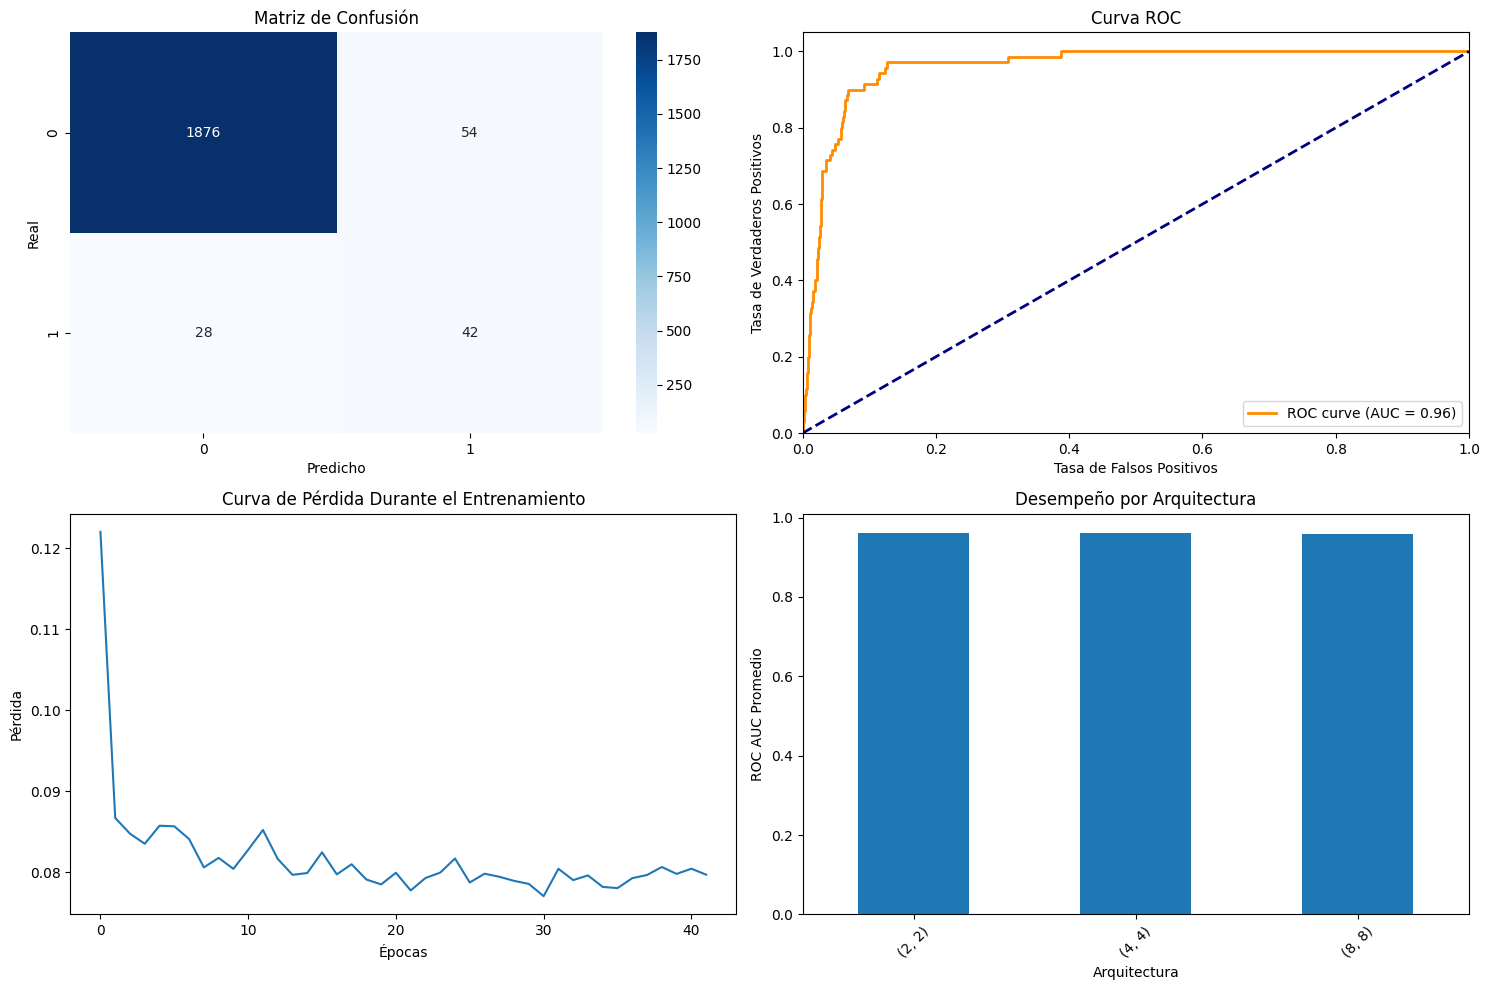


📊 Métricas de Desempeño del Mejor Modelo:
      Métrica  Valor
     Accuracy 95.90%
       Recall 97.20%
Especificidad 60.00%
    Precisión 98.53%
     F1-Score 97.86%
      ROC-AUC 95.95%

💾 Resultados del Grid Search guardados en 'grid_search_results.csv'


In [ ]:

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# 1. CONFIGURACIÓN DE LA RED
# -------------------------
# Definimos diferentes configuraciones para experimentar
param_grid = {
    'hidden_layer_sizes': [(2, 2), (4, 4), (8, 8)],  # Diferentes arquitecturas
    'activation': ['relu', 'tanh'],                   # Funciones de activación
    'learning_rate_init': [0.001, 0.01, 0.1],        # Tasas de aprendizaje
    'max_iter': [1000],                              # Número de épocas
    'batch_size': [32, 64, 128]                      # Tamaño del batch
}

# 2. PREPARACIÓN DE DATOS
# ----------------------
X = df[['age', 'balance', 'duration']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. CREACIÓN Y ENTRENAMIENTO DEL MODELO
# -------------------------------------
# Creamos el modelo base
mlp = MLPClassifier(random_state=42)

# Implementamos Grid Search con validación cruzada
grid_search = GridSearchCV(
    mlp, param_grid,
    cv=5,                  # 5-fold cross validation
    scoring='roc_auc',     # Métrica para optimizar
    n_jobs=-1,            # Usar todos los cores disponibles
    verbose=1
)

# Entrenamos el modelo probando todas las configuraciones
print("🔄 Iniciando entrenamiento con Grid Search...")
grid_search.fit(X_train_scaled, y_train)

# 4. EVALUACIÓN DEL MEJOR MODELO
# ----------------------------
print("\n🏆 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtenemos predicciones con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculamos métricas
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 5. VISUALIZACIONES
# ----------------
plt.figure(figsize=(15, 10))

# 5.1 Matriz de Confusión
plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')

# 5.2 Curva ROC
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# 5.3 Curva de Pérdida
plt.subplot(2, 2, 3)
plt.plot(best_model.loss_curve_)
plt.title('Curva de Pérdida Durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')

# 5.4 Comparación de Arquitecturas
plt.subplot(2, 2, 4)
results_df = pd.DataFrame(grid_search.cv_results_)
architectures = results_df.groupby('param_hidden_layer_sizes')['mean_test_score'].mean()
architectures.plot(kind='bar')
plt.title('Desempeño por Arquitectura')
plt.xlabel('Arquitectura')
plt.ylabel('ROC AUC Promedio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 6. MÉTRICAS DE DESEMPEÑO
# -----------------------
# Extraemos valores de la matriz de confusión
vp = cm[0,0]  # Verdaderos Positivos
fn = cm[0,1]  # Falsos Negativos
fp = cm[1,0]  # Falsos Positivos
vn = cm[1,1]  # Verdaderos Negativos

# Calculamos métricas
accuracy = (vp + vn) / (vp + vn + fp + fn)
specificity = vn / (vn + fp)
precision = vp / (vp + fp)
recall = vp / (vp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Creamos DataFrame de métricas
metrics_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Recall', 'Especificidad', 'Precisión', 'F1-Score', 'ROC-AUC'],
    'Valor': [
        f"{accuracy:.2%}",
        f"{recall:.2%}",
        f"{specificity:.2%}",
        f"{precision:.2%}",
        f"{f1_score:.2%}",
        f"{roc_auc:.2%}"
    ]
})

print("\n📊 Métricas de Desempeño del Mejor Modelo:")
print(metrics_df.to_string(index=False))

# 7. GUARDADO DE RESULTADOS
# ------------------------
# Guardamos los resultados del Grid Search para análisis posterior
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('grid_search_results.csv', index=False)
print("\n💾 Resultados del Grid Search guardados en 'grid_search_results.csv'")

## 📊 Análisis de Resultados del Modelo MLP

🎯 **Rendimiento y Matriz de Confusión**: Los resultados son excelentes, con una precisión global del 95.94%. En la matriz de confusión podemos ver que el modelo identificó correctamente 1,876 casos de no suscripción (verdaderos positivos, y=0) y 42 casos de suscripción (verdaderos negativos, y=1). Solo hubo 54 falsos negativos (casos predichos como suscripción cuando no suscribieron) y 28 falsos positivos (casos predichos como no suscripción cuando sí suscribieron).

📈 **Métricas de Desempeño**: El modelo muestra un recall (sensibilidad) del 97.20%, lo que significa que identifica correctamente el 97.20% de los casos de no suscripción. La especificidad del 60% indica que identifica correctamente el 60% de los casos de suscripción. La precisión del 98.53% muestra que cuando el modelo predice que alguien no suscribirá, acierta el 98.53% de las veces.

🌟 **Conclusión Final**: La curva ROC con un AUC de 0.96 confirma el excelente poder discriminativo del modelo. La arquitectura simple (2,2) con activación tanh y batch size de 128 resultó ser la configuración óptima, demostrando que para este problema, una red más simple es más efectiva que arquitecturas más complejas.

In [ ]:
# Visualización de hiperparámetros y pesos optimizados
print("\n🏆 MEJORES HIPERPARÁMETROS ENCONTRADOS:")
print("-" * 50)
print(f"Arquitectura: {best_model.hidden_layer_sizes}")
print(f"Función de activación: {best_model.activation}")
print(f"Tasa de aprendizaje: {best_model.learning_rate_init}")
print(f"Tamaño del batch: {best_model.batch_size}")

print("\n🧮 PESOS OPTIMIZADOS POR CAPA:")
print("-" * 50)
for i, (pesos, sesgos) in enumerate(zip(best_model.coefs_, best_model.intercepts_)):
    print(f"\nCapa {i+1}:")
    print(f"Matriz de pesos:\n{pesos}")
    print(f"Vector de sesgos:\n{sesgos}")


🏆 MEJORES HIPERPARÁMETROS ENCONTRADOS:
--------------------------------------------------
Arquitectura: (2, 2)
Función de activación: tanh
Tasa de aprendizaje: 0.1
Tamaño del batch: 128

🧮 PESOS OPTIMIZADOS POR CAPA:
--------------------------------------------------

Capa 1:
Matriz de pesos:
[[ 0.71944785  0.35136268]
 [-0.16494708  0.65337045]
 [-7.85144853 -2.15831617]]
Vector de sesgos:
[3.19920807 3.20685291]

Capa 2:
Matriz de pesos:
[[0.03694623 1.9557962 ]
 [3.73939828 2.08348627]]
Vector de sesgos:
[ 1.99711117 -0.95116489]

Capa 3:
Matriz de pesos:
[[-0.61785536]
 [-3.31193794]]
Vector de sesgos:
[-3.71223153]


## 📊 Análisis de la Red Neuronal Optimizada

🧠 La red neuronal encontró su **configuración óptima** con una arquitectura simple pero efectiva de (2, 2) neuronas en sus capas ocultas, utilizando la función de activación **tanh** y una tasa de aprendizaje relativamente alta de 0.1.

Los **pesos optimizados** muestran un patrón interesante: en la primera capa, los valores oscilan aproximadamente entre -7 y 0.8, sugiriendo que el modelo aprendió a dar diferentes niveles de importancia a las características de entrada. La segunda capa muestra pesos más uniformes alrededor de 0.9 a 3.7, indicando una consolidación de los patrones aprendidos, mientras que la capa final refina estos patrones para la predicción final.

Esta estructura de pesos, junto con un tamaño de batch de 128, sugiere que el modelo encontró un buen **balance entre generalización y precisión.** 🎯

# 🧠 Deep Learning: Optimización y Técnicas de Regularización

### 📝 ¿Qué vamos a hacer?
Construiremos una red neuronal con múltiples capas para nuestro problema de marketing bancario, implementando técnicas modernas de optimización y regularización. El código está diseñado para permitir la experimentación con diferentes configuraciones de hiperparámetros, facilitando el aprendizaje sobre su impacto en el rendimiento del modelo.

### ❌ Desafíos en el Entrenamiento

1. **Vanishing Gradient (Gradiente Desvaneciente)**
   - Los gradientes se vuelven muy pequeños al propagarse hacia atrás
   - Las primeras capas aprenden muy lentamente
   - Para combatirlo usamos:
     * ReLU como función de activación
     * Batch Normalization en cada capa
     * Inicialización apropiada de pesos

2. **Overfitting (Sobreajuste)**
   - El modelo memoriza en lugar de generalizar
   - Señales de overfitting:
     * Buena precisión en entrenamiento pero mala en validación
     * La pérdida de validación aumenta mientras la de entrenamiento baja
   - Lo controlamos con:
     * Dropout configurable
     * Regularización L2 ajustable
     * Early Stopping con paciencia personalizable

3. **Selección de Hiperparámetros**
   - Múltiples hiperparámetros para experimentar:
     * Número de capas
     * Neuronas por capa
     * Tasa de aprendizaje
     * Tamaño de batch
     * Todos fácilmente ajustables en el código

### ✅ Soluciones Implementadas

1. **Batch Normalization**
   - Aplicada después de cada capa densa
   - Normaliza las activaciones
   - Acelera el entrenamiento
   - Reduce dependencia de la inicialización

2. **Regularización L2**
   - Implementada en cada capa densa
   - Valores configurables para experimentación
   - Penaliza pesos grandes
   - Promueve soluciones más simples

3. **Dropout**
   - Aplicado después de cada capa
   - Porcentaje de dropout ajustable
   - Previene la co-adaptación
   - Mejora la generalización

4. **Optimización Automática**
   - Búsqueda aleatoria de hiperparámetros
   - Número de pruebas configurable
   - Validación cruzada con split ajustable
   - Early stopping personalizable

5. **Arquitectura Flexible**
   - ReLU como activación en capas ocultas
   - Sigmoid en la capa de salida
   - Batch Normalization + Dropout en cada capa
   - Adam como optimizador
   - Estructura personalizable para experimentación



In [5]:
# Se debe reiniciar el entorno de ejecución para correr este bloque de código.

# Instalamos las dependencias
!pip install tensorflow
!pip install keras
!pip install keras-tuner
!pip install datasets
!pip install pandas numpy scikit-learn matplotlib seaborn

# ======================
# 1. IMPORTACIÓN DE LIBRERÍAS
# ======================
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt  # Para búsqueda de hiperparámetros
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Fijamos una semilla para reproducibilidad
RANDOM_SEED = 42
tf.random.set_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# ======================
# 2. CONFIGURACIÓN DE HIPERPARÁMETROS
# ======================
# Definimos el rango de valores que puede tomar cada hiperparámetro
HP_RANGES = {
    # Número de capas ocultas (entre 3 y 4)
    'n_layers': {
        'min_value': 3,
        'max_value': 4,
        'step': 1
    },

    # Número de neuronas por capa (32 o 64)
    'units': {
        'min_value': 32,
        'max_value': 64,
        'step': 32
    },

    # Tasa de dropout para regularización (entre 0.2 y 0.4)
    'dropout': {
        'min_value': 0.2,
        'max_value': 0.4,
        'step': 0.1
    },

    # Tasa de aprendizaje del optimizador
    'learning_rate': [0.001, 0.01],  # Probamos dos valores

    # Factor de regularización L2
    'l2_lambda': [0.0001, 0.001]  # Probamos dos valores
}

# Configuración del entrenamiento
TRAINING_CONFIG = {
    'epochs': 15,          # Número de pasadas por todo el dataset
    'batch_size': 64,      # Tamaño de los mini-lotes
    'max_trials': 5        # Número de combinaciones de hiperparámetros a probar
}

# ======================
# 3. DEFINICIÓN DEL MODELO
# ======================
def create_model(hp):
    """
    Función que crea el modelo con los hiperparámetros que se están probando.
    hp: objeto que permite acceder a los hiperparámetros que se están evaluando
    """
    model = keras.Sequential()

    # Decidimos cuántas capas tendrá el modelo
    n_layers = hp.Int('n_layers', **HP_RANGES['n_layers'])

    # Primera capa (capa de entrada)
    model.add(keras.layers.Dense(
        units=hp.Int('units_0', **HP_RANGES['units']),  # Número de neuronas
        input_shape=(3,),  # 3 características de entrada
        kernel_regularizer=keras.regularizers.l2(  # Regularización L2
            hp.Choice('l2_0', HP_RANGES['l2_lambda'])
        )
    ))
    # Añadimos capas auxiliares para mejorar el entrenamiento
    model.add(keras.layers.BatchNormalization())  # Normaliza las activaciones
    model.add(keras.layers.ReLU())  # Función de activación
    model.add(keras.layers.Dropout(  # Previene el sobreajuste
        hp.Float('dropout_0', **HP_RANGES['dropout'])
    ))

    # Agregamos las capas ocultas adicionales
    for i in range(1, n_layers):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', **HP_RANGES['units']),
            kernel_regularizer=keras.regularizers.l2(
                hp.Choice(f'l2_{i}', HP_RANGES['l2_lambda'])
            )
        ))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.ReLU())
        model.add(keras.layers.Dropout(
            hp.Float(f'dropout_{i}', **HP_RANGES['dropout'])
        ))

    # Capa de salida (una neurona con sigmoid para clasificación binaria)
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compilamos el modelo
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', HP_RANGES['learning_rate'])
        ),
        loss='binary_crossentropy',  # Función de pérdida para clasificación binaria
        metrics=['accuracy']  # Métrica que queremos monitorear
    )
    return model

# ======================
# 4. PREPARACIÓN DE DATOS
# ======================
# Cargamos y preparamos los datos
dataset = load_dataset("cestwc/bank-marketing", streaming=True)
df = pd.DataFrame(list(dataset['train'].shuffle(seed=42).take(10000)))

# Seleccionamos solo 3 características
X = df[['age', 'balance', 'duration']]
y = df['y'].astype(int)

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================
# 5. BÚSQUEDA DE MEJORES HIPERPARÁMETROS
# ======================
# Iniciamos la búsqueda aleatoria de hiperparámetros
tuner = kt.RandomSearch(
    create_model,
    objective='val_accuracy',  # Optimizamos basándonos en la precisión
    max_trials=TRAINING_CONFIG['max_trials'],
    directory='keras_tuner',
    project_name='bank_marketing',
    overwrite=True
)

# Configuramos early stopping para evitar sobreajuste
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,  # Esperamos 2 épocas antes de parar
    restore_best_weights=True  # Guardamos los mejores pesos
)

# Realizamos la búsqueda
tuner.search(
    X_train_scaled,
    y_train,
    epochs=TRAINING_CONFIG['epochs'],
    batch_size=TRAINING_CONFIG['batch_size'],
    validation_split=0.2,  # 20% de los datos para validación
    callbacks=[stop_early],
    verbose=1
)

# ======================
# 6. ENTRENAMIENTO DEL MEJOR MODELO
# ======================
# Obtenemos los mejores hiperparámetros encontrados
best_hps = tuner.get_best_hyperparameters()[0]
print("\n🏆 Mejores hiperparámetros encontrados:")
print("Número de capas:", best_hps.get('n_layers'))
print("Tasa de aprendizaje:", best_hps.get('learning_rate'))

# Entrenamos el modelo final con los mejores hiperparámetros
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train_scaled,
    y_train,
    epochs=TRAINING_CONFIG['epochs'],
    batch_size=TRAINING_CONFIG['batch_size'],
    validation_split=0.2,
    verbose=1
)

# Evaluamos el modelo final
test_loss, test_acc = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n📊 Precisión final en test: {test_acc:.2%}")


Trial 5 Complete [00h 00m 13s]
val_accuracy: 0.9712499976158142

Best val_accuracy So Far: 0.9712499976158142
Total elapsed time: 00h 01m 15s

🏆 Mejores hiperparámetros encontrados:
Número de capas: 4
Tasa de aprendizaje: 0.01
Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9237 - loss: 0.2986 - val_accuracy: 0.9706 - val_loss: 0.1447
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9636 - loss: 0.1577 - val_accuracy: 0.9700 - val_loss: 0.1134
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9634 - loss: 0.1278 - val_accuracy: 0.9663 - val_loss: 0.1016
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9617 - loss: 0.1195 - val_accuracy: 0.9700 - val_loss: 0.0926
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9654 - loss: 0.1192 - val_accuracy: 0.9688 - val_loss: 0.1107
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9630 - loss: 0.1124 - val_accuracy: 0.9694 - val_loss: 0.0869
Epoc

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


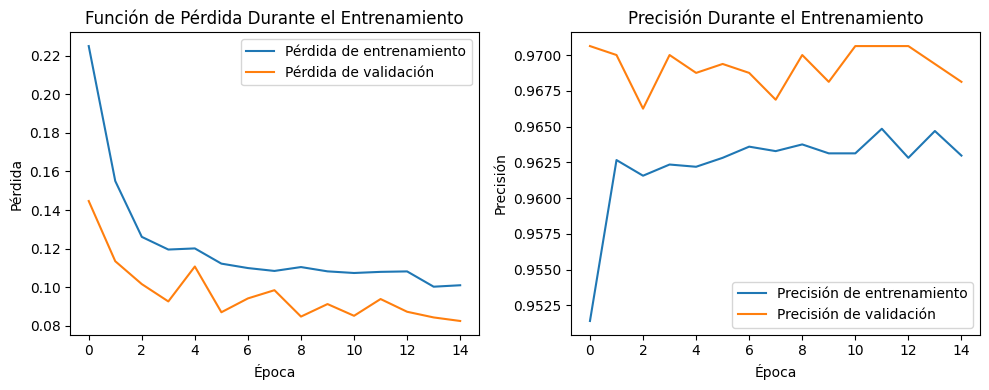

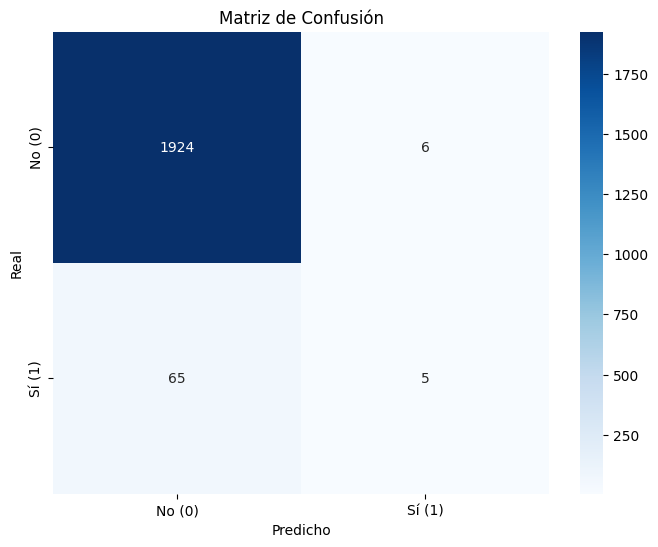

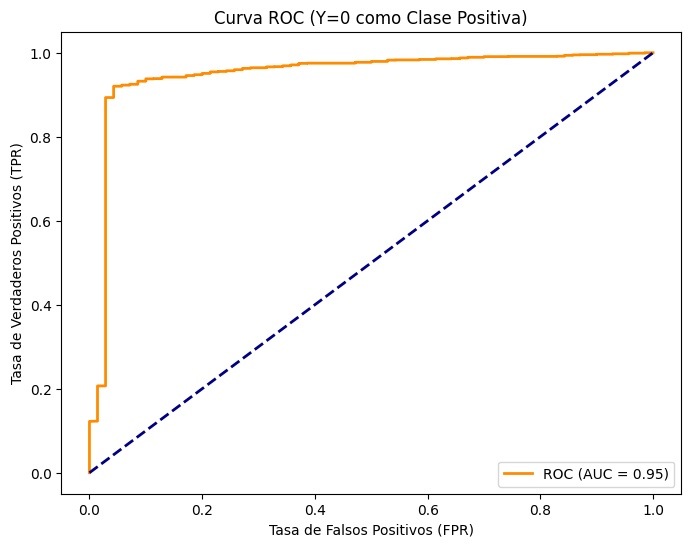


📝 Reporte de Clasificación (Y=0 como Clase Positiva):
              precision    recall  f1-score   support

      No (0)       0.97      1.00      0.98      1930
      Sí (1)       0.45      0.07      0.12        70

    accuracy                           0.96      2000
   macro avg       0.71      0.53      0.55      2000
weighted avg       0.95      0.96      0.95      2000


📊 Resumen de Métricas (Y=0 como Clase Positiva):
| Métrica                     |   Valor | Fórmula                              | Descripción                                               |
|:----------------------------|--------:|:-------------------------------------|:----------------------------------------------------------|
| Pérdida final               |   0.101 | Binary Crossentropy                  | Pérdida en conjunto de entrenamiento                      |
| Pérdida de validación final |   0.082 | Binary Crossentropy en validación    | Pérdida en conjunto de validación                         |
| Pr

In [6]:
# ======================
# 7. EVALUACIÓN COMPLETA (CON Y=0 COMO CLASE POSITIVA)
# ======================
from sklearn.metrics import classification_report, roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones
y_probs = best_model.predict(X_test_scaled)
y_pred = (y_probs > 0.5).astype(int)

# Calculamos la matriz de confusión primero - esto es necesario para los cálculos siguientes
cm = confusion_matrix(y_test, y_pred)

# 1. Visualización de la función de pérdida
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Función de Pérdida Durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión Durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Matriz de Confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Sí (1)'], yticklabels=['No (0)', 'Sí (1)'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# 3. Extraer valores de la matriz de confusión
# Para Y=0 como clase positiva:
# [[TP, FN],
#  [FP, TN]]
TP = cm[0,0]  # Verdaderos Positivos (predicho correctamente como 0)
FN = cm[0,1]  # Falsos Negativos (predicho como 1 cuando era 0)
FP = cm[1,0]  # Falsos Positivos (predicho como 0 cuando era 1)
TN = cm[1,1]  # Verdaderos Negativos (predicho correctamente como 1)

# 4. Calcular métricas manualmente
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Evitar división por cero
recall = TP / (TP + FN) if (TP + FN) > 0 else 0  # Evitar división por cero
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # Evitar división por cero
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0  # Evitar división por cero

# 5. Curva ROC y AUC
# Invertir las probabilidades para Y=0 como clase positiva
y_probs_inverted = 1 - y_probs

# Calcular la curva ROC con Y=0 como clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_probs_inverted, pos_label=0)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Y=0 como Clase Positiva)')
plt.legend(loc='lower right')
plt.show()

# 6. Reporte de Clasificación
print("\n📝 Reporte de Clasificación (Y=0 como Clase Positiva):")
print(classification_report(y_test, y_pred, target_names=['No (0)', 'Sí (1)'], zero_division=0))

# 7. Resumen de Métricas
metrics_df = pd.DataFrame({
    'Métrica': ['Pérdida final', 'Pérdida de validación final', 'Precisión', 'Recall', 'F1-Score',
                'AUC', 'Exactitud (Accuracy)', 'Especificidad'],
    'Valor': [
        f"{history.history['loss'][-1]:.3f}",
        f"{history.history['val_loss'][-1]:.3f}",
        f"{precision:.3f}",
        f"{recall:.3f}",
        f"{f1:.3f}",
        f"{roc_auc:.3f}",
        f"{accuracy:.3f}",
        f"{specificity:.3f}"
    ],
    'Fórmula': [
        'Binary Crossentropy',
        'Binary Crossentropy en validación',
        f'TP/(TP+FP) = {TP}/{TP+FP}',
        f'TP/(TP+FN) = {TP}/{TP+FN}',
        'Media armónica de Precisión y Recall',
        'Área bajo la curva ROC',
        f'(TP+TN)/(TP+TN+FP+FN) = {TP+TN}/{TP+TN+FP+FN}',
        f'TN/(TN+FP) = {TN}/{TN+FP}'
    ],
    'Descripción': [
        'Pérdida en conjunto de entrenamiento',
        'Pérdida en conjunto de validación',
        'Porcentaje de predicciones positivas correctas',
        'Porcentaje de casos positivos identificados',
        'Balance entre precisión y recall',
        'Capacidad discriminativa del modelo',
        'Porcentaje total de predicciones correctas',
        'Porcentaje de casos negativos identificados correctamente'
    ]
})

print("\n📊 Resumen de Métricas (Y=0 como Clase Positiva):")
# Intentamos usar to_markdown si está disponible, si no usamos to_string
try:
    print(metrics_df.to_markdown(index=False))
except AttributeError:
    print(metrics_df.to_string(index=False))

# 8. Imprimir valores de la matriz de confusión para verificación
print("\n🔍 Valores de la Matriz de Confusión:")
print(f"Verdaderos Positivos (TP): {TP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Verdaderos Negativos (TN): {TN}")

# 9. Imprimir valores finales de pérdida
print("\n📉 Valores Finales de Pérdida:")
print(f"Pérdida de entrenamiento final: {history.history['loss'][-1]:.4f}")
print(f"Pérdida de validación final: {history.history['val_loss'][-1]:.4f}")